In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from collections import Counter

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_excel('globalterrorismdb_0617dist.xlsx')

In [5]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
df.shape

(170350, 135)

In [8]:
# Rename column names
df_2 = df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',\
                          'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',\
                          'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',\
                          'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'})

In [9]:
# Getting only predictive features
df_2 = df_2[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType',\
             'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [10]:
# Getting the number of all victims
df_2['Victims'] = df_2['Killed'] + df_2['Wounded']

In [11]:
df_2.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Victims
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.983773,23.728157,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [12]:
# Checking for the null values
df_2.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              446
latitude         4606
longitude        4606
AttackType          0
Killed           9682
Wounded         15325
Target            634
Summary         66138
Group               0
Target_type         0
Weapon_type         0
Motive         121764
Victims         15826
dtype: int64

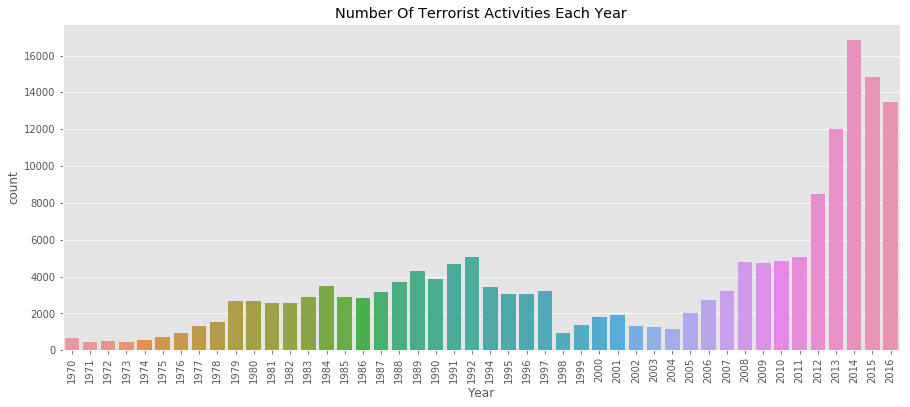

In [13]:
plt.subplots(figsize=(15,6))
sns.countplot('Year', data=df_2)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

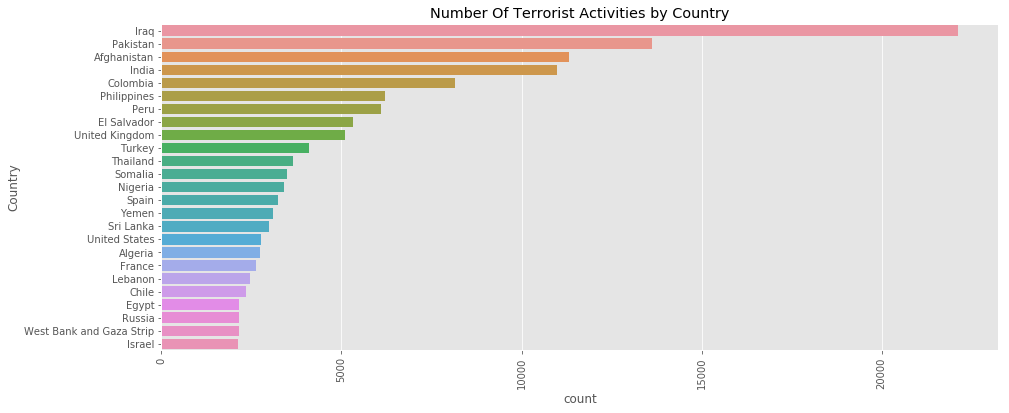

In [14]:
plt.subplots(figsize=(15,6))
sns.countplot(y = 'Country', data = df_2, order = df_2.Country.value_counts().iloc[:25].index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities by Country')
plt.show()

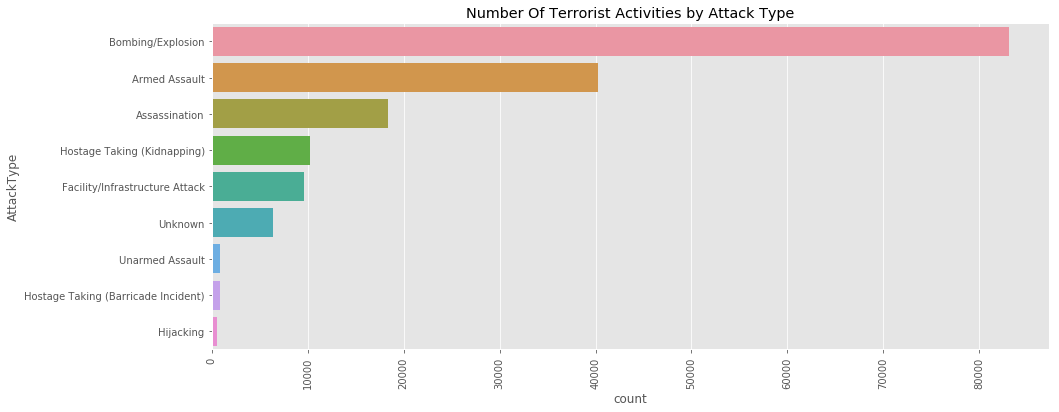

In [15]:
plt.subplots(figsize=(15,6))
sns.countplot(y = 'AttackType', data = df_2, order = df_2.AttackType.value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities by Attack Type')
plt.show()

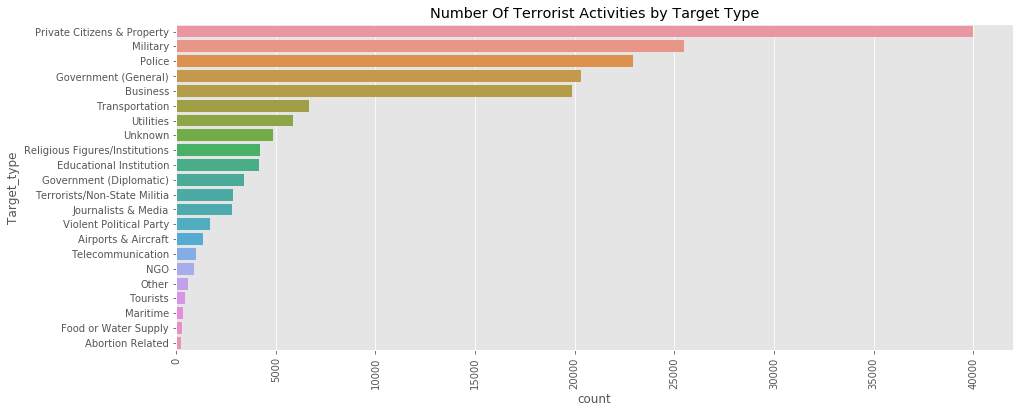

In [16]:
plt.subplots(figsize=(15,6))
sns.countplot(y = 'Target_type', data = df_2, order = df_2.Target_type.value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities by Target Type')
plt.show()

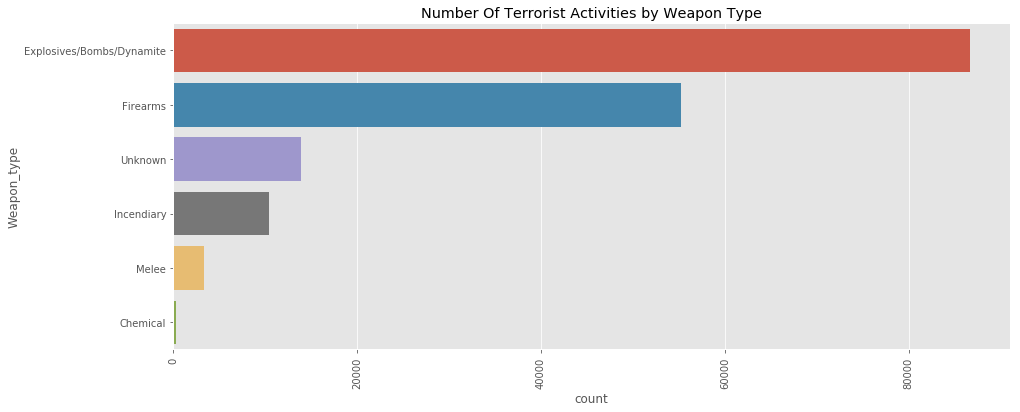

In [17]:
plt.subplots(figsize=(15,6))
sns.countplot(y = 'Weapon_type', data = df_2, order = df_2.Weapon_type.value_counts().iloc[:6].index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities by Weapon Type')
plt.show()

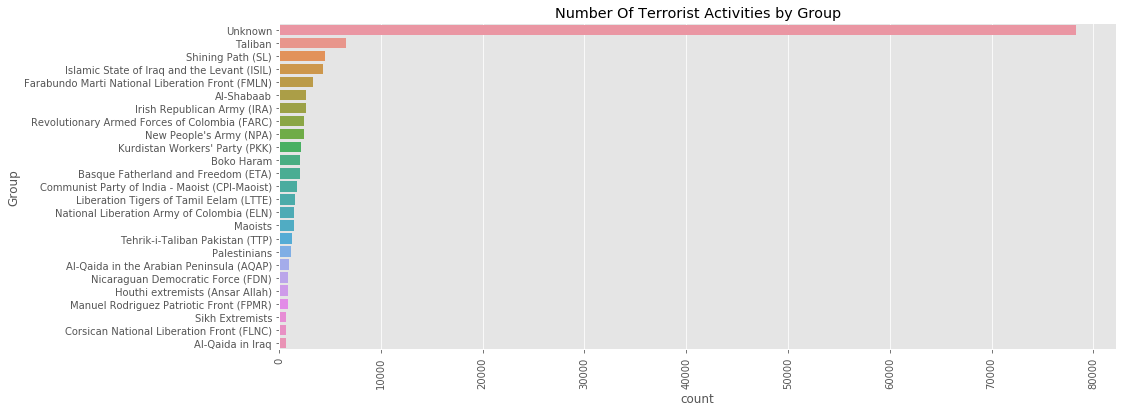

In [18]:
plt.subplots(figsize=(15,6))
sns.countplot(y = 'Group', data = df_2, order = df_2.Group.value_counts().iloc[:25].index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities by Group')
plt.show()

In [19]:
# Counting numbers and filtering out the groups which have less than 3 attacks
group_counts = Counter(df_2['Group'])
filtered_groups = [group for group, counter in group_counts.items() if counter > 3]
filtered_groups.remove('Unknown')

df_2 = df_2[df_2['Group'].isin(filtered_groups)]

In [20]:
# dropping non-predictive columns
df_2 = df_2.drop(['latitude','longitude','Killed','Wounded','Target','Summary','Motive'],1)

In [21]:
df_2.shape

(88657, 11)

In [22]:
df_2.sample(10)

,Year,Month,Day,Country,Region,city,AttackType,Group,Target_type,Weapon_type,Victims
33010,1988,1,6,Philippines,Southeast Asia,Matalam,Hostage Taking (Kidnapping),New People's Army (NPA),Government (General),Firearms,0.0
23456,1984,10,19,Peru,South America,Churcampa,Bombing/Explosion,Shining Path (SL),Private Citizens & Property,Explosives/Bombs/Dynamite,2.0
4972,1977,7,19,Italy,Western Europe,Rome,Armed Assault,Proletarian Patrols,Private Citizens & Property,Incendiary,0.0
83642,2007,7,4,Nepal,South Asia,Janajpur,Unknown,Janatantrik Terai Mukti Morcha- Jwala Singh (J...,Private Citizens & Property,Unknown,1.0
111779,2012,10,27,Iraq,Middle East & North Africa,Mosul,Armed Assault,Al-Qaida in Iraq,Private Citizens & Property,Firearms,6.0
22548,1984,7,14,Peru,South America,Cangallo,Unknown,Shining Path (SL),Police,Unknown,2.0
89899,2008,12,23,Somalia,Sub-Saharan Africa,Unknown,Armed Assault,Ahlu-sunah Wal-jamea (Somalia),Terrorists/Non-State Militia,Firearms,10.0
4673,1977,5,2,Lebanon,Middle East & North Africa,Beirut,Bombing/Explosion,Armenian Secret Army for the Liberation of Arm...,Military,Explosives/Bombs/Dynamite,0.0
11791,1980,9,14,Nicaragua,Central America & Caribbean,Mata Platano,Unknown,Counter-revolutionaries,Military,Unknown,5.0
95301,2010,2,19,Rwanda,Sub-Saharan Africa,Kigali,Bombing/Explosion,Hutu extremists,Business,Explosives/Bombs/Dynamite,11.0


In [23]:
df_2 = df_2.dropna()

In [24]:
df_2.shape

(77518, 11)

In [25]:
pd.options.mode.chained_assignment = None

#For loop for converting text categories into numerical categories
text_features = ['Country','Region','city','AttackType','Group','Target_type','Weapon_type','Victims']
for x in text_features:
    df_2[x] = df_2[x].factorize()[0]

In [26]:
df_2.sample(6)

,Year,Month,Day,Country,Region,city,AttackType,Group,Target_type,Weapon_type,Victims
62562,1996,6,12,11,1,7927,3,533,4,1,10
65188,1997,4,27,54,6,960,7,27,2,6,1
40797,1989,12,10,50,10,4379,4,440,2,3,18
146235,2015,4,6,116,6,13278,1,765,7,1,1
91085,2009,3,25,50,10,5908,1,111,7,1,11
55179,1994,2,19,29,6,6305,1,537,10,1,10


In [27]:
df_3 = df_2

In [28]:
# Defining target and feature sets & converting them into numpy arrays for sklearn
y = df_3['Group']
y = np.array(y)
X_df = df_3.drop('Group',1)
X = np.array(X_df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [29]:
X.shape

(77518, 10)

In [30]:
y.shape

(77518,)

# Decision Tree Models

In [31]:
dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [32]:
conf_mat = confusion_matrix(y_test, y_pred)

In [33]:
conf_mat

array([[11,  0,  0, ...,  0,  0,  0],
       [ 0, 12,  0, ...,  0,  0,  0],
       [ 0,  0, 14, ...,  0,  0,  0],
       ..., 
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  1]])

In [34]:
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test, y_test))

print('The accuracy is:', np.mean(y_pred==y_test))

0.999410268696
0.72364121087
The accuracy is: 0.72364121087


In [35]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [36]:
conf_mat = confusion_matrix(y_test, y_pred)

In [37]:
conf_mat

array([[10,  0,  0, ...,  0,  0,  0],
       [ 0, 12,  0, ...,  0,  0,  0],
       [ 0,  0, 14, ...,  0,  0,  0],
       ..., 
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  1]])

In [38]:
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

print('The accuracy is:', np.mean(y_pred==y_test))

0.990453724522
0.753998968008
The accuracy is: 0.753998968008


# Trying other models

In [39]:
# I only use this line when I run the models quickly for model selection. I could not use whole dataset here
# Because it takes too much time and runs out my application memory.
df_4 = df_2.sample(3000)
y = df_4['Group']
y = np.array(y)
X_df = df_4.drop('Group',1)
X = np.array(X_df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [40]:
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC()
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of 

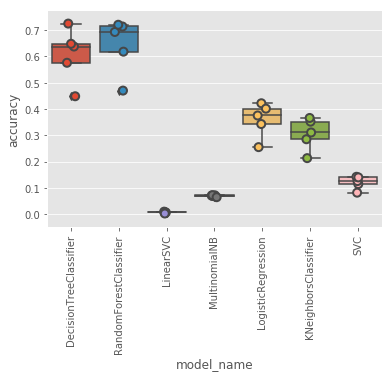

In [41]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(rotation=90)
plt.show()

# Searching for the best parameters with the most successful model

In [42]:
param_grid = {
    'max_features': ['sqrt', 'log2', None],
    'n_estimators': [10, 100, 500],
    'min_samples_leaf': [1, 5, 10, 20, 40]
}

grid_search_model = GridSearchCV(estimator=rf_model,
                                 param_grid=param_grid,
                                 refit=True)
grid_search_model.fit(X_train, y_train)
grid_search_model.best_estimator_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
# Get the top 10 feature importances
features_importances = list(zip(X_df.columns, grid_search_model.best_estimator_.feature_importances_))
features_importances.sort(key=lambda x:x[1], reverse=True)
features_importances[:10]

[('Country', 0.3352562020412469),
 ('Year', 0.17082133915374129),
 ('city', 0.097490519779889373),
 ('Region', 0.087547816195712502),
 ('Day', 0.069281252393009529),
 ('Month', 0.068056703086674372),
 ('Target_type', 0.059584834549085024),
 ('Victims', 0.049215971891787072),
 ('AttackType', 0.031767915590041176),
 ('Weapon_type', 0.030977445318812441)]